<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

*Aufpassen*:<br>
NaNs in char-Feldern von Pandas-Dataframes erzeugen Spalten im R data.frame
=> voher ersetzen

In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
%load_ext rpy2.ipython
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

In [3]:
%%R
df <- data.frame(a=1:2,b=1:2)

In [4]:
r.df

,a,b
0,1,1
1,2,2


In [5]:
import pandas as pd
import numpy as np


titanic = pd.read_csv("~/Documents/Data/titanic.csv")
titanic['Sex'] = np.where(titanic['Sex']=='male', '0', '1')
titanic["Cabin"].fillna('NaN',inplace=True)
titanic["Embarked"].fillna('NaN',inplace=True)
#titanic.info()

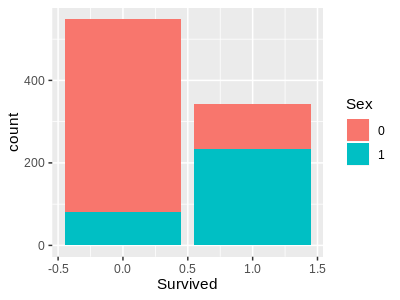

In [6]:
%%R -i titanic  -w 4 -h 3 --units in -r 100

library(tidyverse)

titanic$Sex <- factor(titanic$Sex)

ggplot(titanic, aes(Survived,fill=Sex)) + 
    geom_bar()

In [7]:
%%R -i titanic  -w 4 -h 3 --units in -r 100

library(factoextra)

titanic <- titanic %>% na.omit()
titanic_num <- titanic %>%
    select_if(is.numeric) %>%
    select(-1) %>%
    na.omit()

pca <- prcomp(titanic_num, scale=TRUE, center=TRUE)
#fviz_pca_var(pca, col.var = "contrib", 
            #gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
#             repel = TRUE)

R[write to console]: Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ



In [ ]:
%%R -w 8 -h 8 --units in -r 100
fviz_pca_biplot(pca, habillage=as.factor(titanic_num$Survived),
                label ="var", repel = TRUE) + 
                xlim(-5,5.5) + ylim(-4.5,4.5) + theme_minimal()

In [ ]:
%%R
library(rpart)
library(rpart.plot)
library(broom)

titanic_num$Sex <- fct_recode(factor(titanic$Sex), 'female' = '1', 'male' = '0')
fit <- rpart(factor(Survived) ~ ., titanic_num)
fit$variable.importance 

In [ ]:
%%R
rpart.plot(fit,extra=102)